# Preprocess Datasets and Extract Features
> Feature engineering notebook

Dataset columns (same convention as the lab1):

| Col1 | Col2 | Col3 | Col3 | $\dots$ |
|------|------|------|------|---------|
| $Y$  |$Y_0$ | $X_1$| $X_2$| $\dots$ |

- $Y$ : labels or target values, in our case $X(T+5)$
- $Y_0$ : present value $X(T+0)$
- $X_1$, $X_2$, $\dots$ : other features

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
# matplotlib.rcParams['font.size']= 22 # use for presentation

In [1]:
from src.datautils import windowed_data, windowed_diff_data, windowed_diff_with_step, windowed_momentum_force

## Import Normalized Datasets

In [2]:
ls 

0_normalize_dataset_week2.ipynb    README.md           sg_temps/     src@
1_preprocess_features_week2.ipynb  persistence_T5.npy  sg_temps.csv
2_train_nn_week2.ipynb             raw_data_stats.csv  sg_temps.npy


In [ ]:
# Normalized dataset
with open('./sg_temps.npy', 'rb') as f:
    x_norm = np.load(f)

## Extract Features

- Revision video: [Session 3: The Prediction Pipeline](https://youtu.be/4W6-48wXXEc?t=1246)

number of samples in normalized datasets

In [ ]:
print(f"x_norm: {x_norm.shape[0]} samples")

x_norm: 876 samples


### Naive Window as Features

In [ ]:
# parameters for `windowed_data()`
window_size = 21 # Y(T+0) and "window_size-1" previous points, T-1,T-2,...,T-window_size+1
lead_time = 5 # T+5
start_time = window_size-1 # index of last elem of window

- Traing dataset, with window width 6; columns:`[Y(T+5), Y(T+0), ...,Y(T-5)]` 

In [ ]:
X_norm_wind = windowed_data(x_norm, lead_time=lead_time, window_size=window_size)
split_index = X_norm_wind.shape[0]*70//100
X_train = X_norm_wind[:split_index,:]
X_test = X_norm_wind[split_index:,:]
print(f'Full windowed dataset: {X_norm_wind.shape}')
print(f'Training dataset (1st column is target Y(T+{lead_time})):',X_train.shape,f"\nwindowsize:{window_size}")
print(f'Testing dataset (1st column is target Y(T+{lead_time})):',X_test.shape,f"\nwindowsize:{window_size}")

Full windowed dataset: (851, 22)
Training dataset (1st column is target Y(T+5)): (595, 22) 
windowsize:21
Testing dataset (1st column is target Y(T+5)): (256, 22) 
windowsize:21


In [ ]:
# plt.figure(figsize=[25,10])
# plt.plot(X_train[:,0],alpha=.8)
# plt.plot(X_train[:,2],alpha=.8)

- Testing dataset

In [ ]:
# plt.figure(figsize=[25,10])
# plt.plot(X_test[:,0],alpha=.8,label='Y(T+5)')
# plt.plot(X_test[:,1],alpha=.8,label='Y(T+0)')
# plt.plot(X_test[:,-1],alpha=.8,label=f'Y(T-{window_size-1})')
# # plt.axis([4000,4200,-1.1,2.5])
# plt.legend()

---

write training datasets to :
- `train_preprocessed_naivewin6.npy` and
- `test_preprocessed_naivewin6.npy`

`naivewin{}` stands for naive windowed data with window width `{}`

In [ ]:
# Training data
with open(f'train_preprocessed_naivewin{window_size}.npy', 'wb') as f:
    np.save(f,X_train)
# Testing data
with open(f'test_preprocessed_naivewin{window_size}.npy', 'wb') as f:
    np.save(f,X_test)

### Differences as Features

- First column is `Y(T+5)` (target value that we are trying to predict)
- 2nd column is `Y(T+0)`, present value
- 3rd to (`window_size`+1)$^{th}$ are differences: `[Y(T+0)-Y(T-1), Y(T-1)-Y(T-2), Y(T-2)-Y(T-3), ..., Y(T-window_size+2)-Y(T-window_size+1)]`

In [ ]:
window_size = 21 # Y(T+0) and "window_size-1" previous points, T-1,...,T-4,T-5
lead_time = 5 # T+5
start_time = window_size-1 # index of last elem of window

- Traing dataset, with window width 6 

In [ ]:
X_norm_wind = windowed_diff_data(x_norm, lead_time=lead_time, window_size=window_size)
split_index = X_norm_wind.shape[0]*70//100
X_train = X_norm_wind[:split_index,:]
X_test = X_norm_wind[split_index:,:]
print(f'Full windowed dataset: {X_norm_wind.shape}')
print(f'Training dataset (1st column is target Y(T+{lead_time})):',X_train.shape,f"\nwindowsize:{window_size}")
print(f'Testing dataset (1st column is target Y(T+{window_size})):',X_test.shape,f"\nwindowsize:{window_size}")

Full windowed dataset: (851, 22)
Training dataset (1st column is target Y(T+5)): (595, 22) 
windowsize:21
Testing dataset (1st column is target Y(T+21)): (256, 22) 
windowsize:21


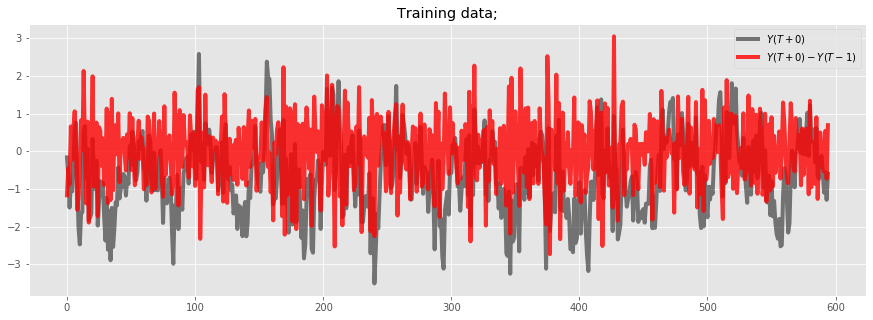

In [ ]:
xaxis_range = [] # full range
# xaxis_range = [200,300]

plt.figure(figsize=[15,5])
# plt.plot(X_test[:,2:],'o-',alpha=.3);
plt.plot(X_train[:,1],'k-',lw=4,alpha=.5,label='$Y(T+0)$');
plt.plot(X_train[:,2],'r-',lw=4,alpha=.8,label='$Y(T+0)-Y(T-1)$');
plt.legend()
plt.title(f'Training data;')
if len(xaxis_range)==2:
    axs_lims=plt.axis()
    plt.axis([xaxis_range[0],xaxis_range[1],axs_lims[2],axs_lims[3]*.8])
plt.show()

- Testing dataset

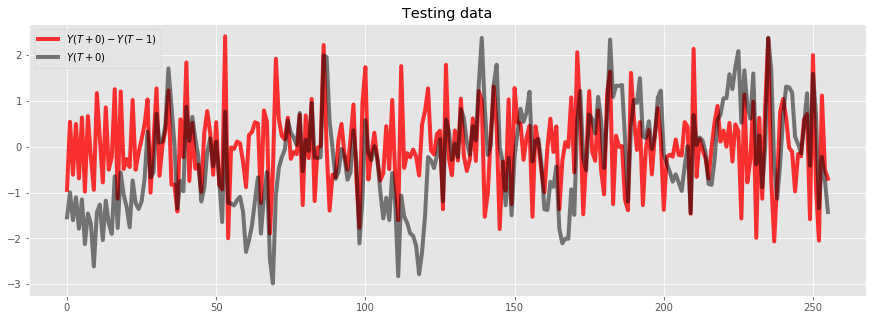

In [ ]:
xaxis_range = [] # full range
# xaxis_range = [4100,4300]
plt.figure(figsize=[15,5])
# plt.plot(X_test[:,2:],'o-',alpha=.3);
plt.plot(X_test[:,2],'r-',lw=4,alpha=.8,label='$Y(T+0)-Y(T-1)$');
plt.plot(X_test[:,1],'k-',lw=4,alpha=.5,label='$Y(T+0)$');
plt.legend()
plt.title('Testing data')
if len(xaxis_range)==2:
    axs_lims=plt.axis()
    plt.axis([xaxis_range[0],xaxis_range[1],axs_lims[2],axs_lims[3]*.3])
plt.show()

---

write training datasets to :
- `train_preprocessed_diff{window_size}.npy` and
- `test_preprocessed_diff{window_size}.npy`

`diff{window_size}` part stands for difference data for differences from `T-window_size+1` to `T+0` (`window_size-1` $\Delta T$'s), so we have `window_size-1` differences for previous "`window_size`" points, and current `Y(T+0)` value as input for our model (network).

In [ ]:
# Training data
with open(f'train_preprocessed_diff{window_size}.npy', 'wb') as f:
    np.save(f,X_train)
# Testing data
with open(f'test_preprocessed_diff{window_size}.npy', 'wb') as f:
    np.save(f,X_test)

### Lead Time Differences (diff==lead_time)

In [ ]:
X_norm_wind = windowed_diff_with_step(x_norm, lead_time=lead_time, window_size=window_size,h=lead_time)

split_index = X_norm_wind.shape[0]*70//100
X_train = X_norm_wind[:split_index,:]
X_test = X_norm_wind[split_index:,:]
print(f'Full windowed dataset: {X_norm_wind.shape}')
print(f'Training dataset (1st column is target Y(T+{lead_time})):',X_train.shape,f"\nwindowsize:{window_size}")
print(f'Testing dataset (1st column is target Y(T+{lead_time})):',X_test.shape,f"\nwindowsize:{window_size}")

Full windowed dataset: (851, 18)
Training dataset (1st column is target Y(T+5)): (595, 18) 
windowsize:21
Testing dataset (1st column is target Y(T+5)): (256, 18) 
windowsize:21


In [ ]:
# Training data
with open(f'train_preprocessed_stepdiff{window_size}.npy', 'wb') as f:
    np.save(f,X_train)
# Testing data
with open(f'test_preprocessed_stepdiff{window_size}.npy', 'wb') as f:
    np.save(f,X_test)

### Force and Momentum with Step Size==Lead Time
Momentum = Difference of Differences

Force = Difference of Momentum

In [ ]:
X_norm_wind = windowed_momentum_force(x_norm,lead_time=lead_time,window_size=window_size,h=lead_time)

split_index = X_norm_wind.shape[0]*70//100
X_train = X_norm_wind[:split_index,:]
X_test = X_norm_wind[split_index:,:]
print(f'Full windowed dataset: {X_norm_wind.shape}')
print(f'Training dataset (1st column is target Y(T+{lead_time})):',X_train.shape,f"\nwindowsize:{window_size}")
print(f'Testing dataset (1st column is target Y(T+{lead_time})):',X_test.shape,f"\nwindowsize:{window_size}")

Full windowed dataset: (851, 35)
Training dataset (1st column is target Y(T+5)): (595, 35) 
windowsize:21
Testing dataset (1st column is target Y(T+5)): (256, 35) 
windowsize:21


In [ ]:
# Training data
with open(f'train_preprocessed_mntfrcwin{window_size}.npy', 'wb') as f:
    np.save(f,X_train)
# Testing data
with open(f'test_preprocessed_mntfrcwin{window_size}.npy', 'wb') as f:
    np.save(f,X_test)